<h1 align='center'> Assignment 5</h1>
<h2 align='center'> Due: Sunday, April 23, 2017 by 11:59:59 p.m. </h2>

<p>&nbsp;</p>

This is the starter notebook with your data for clustering and your network for pagerank.  You must add the rest.  

First, we do the usual imports:

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

from numpy import diag, array, matrix, pi, sqrt, set_printoptions
from scipy import linalg

set_printoptions(precision = 5, suppress = True)

Next, we import several packages and options, including the __DataFrame__ class from __pandas__ which produces a nice visual display of a matrix (especially once we pass it our custom format __fmt__ function). 

In [15]:
import networkx as nx

from pandas import DataFrame, set_option, read_csv
def fmt(x):
    if( abs(x) < 1e-8):
        return '0'
    x = complex(x)
    if( abs(x.imag ) < 1e-8 ) :
        return '%.5f' % x.real
    elif( abs(x.real) < 1e-8) :
        return '%.5fj'% x.imag
    else:
        return '%.5f+%.5fj' % (x.real, x.imag)

set_option('display.float_format',fmt) 

##  Also, going to ignore deprecation warnings
import warnings
warnings.simplefilter("ignore")

## Spectral Clustering -- Exercise 1

The command below will list the files in your current folder.  _ __The file WisconsinBreastCancer.csv must be one of them!__ _

In [16]:
ls

Assignment2Starter.ipynb                  LinearSystemsConditionNumber.ipynb
Assignment2StarterMaria.ipynb             LucyDavisGrayScale.png
Assignment3.ipynb                         metastore_db/
Assignment4.ipynb                         MoorePenroseMarch13.ipynb
BlurredImage.bmp                          NLASpring2016/
CharlotteDujardinSmallGray.png            OldMan.bmp
CompanionMatrices.ipynb                   PCAinMachineLearning.ipynb
derby.log                                 plot_cluster_comparison.ipynb
ExampleAssignment5.ipynb                  plot_pca_iris.ipynb
Examples1.ipynb                           QRFeb13.ipynb
Examples2.ipynb                           QRFeb15.ipynb
Examples3.ipynb                           SchurFeb24.ipynb
GettingStartedWithPythonViaJupyter.ipynb  SVDMarch1.ipynb
GraphTheoryExamples1.ipynb                UnitaryFeb17.ipynb
GraphTheoryExamples2.ipynb                WavWork/
GraphTheoryExamples3.ipynb                WisconsinBreastCancer.csv
ImgWork/    

In [17]:
WisconsinBreastCancerData = read_csv('WisconsinBreastCancer.csv')
WisconsinBreastCancerData.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     17.99000      10.38000       122.80000 1001.00000   
1          1     20.57000      17.77000       132.90000 1326.00000   
2          1     19.69000      21.25000       130.00000 1203.00000   
3          1     11.42000      20.38000        77.58000  386.10000   
4          1     20.29000      14.34000       135.10000 1297.00000   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   

   symmetry_mean           ...             radius_worst  texture_worst  \
0        0.24190           ...                 25.38000       17.33000   
1        0.18120           ...                 24.99000       23.41000   
2        0.20690           ...                 23.57000       25.53000   
3        0.25970           ...                 14.91000       26.50000   
4        0.18090           ...                 22.54000       16.67000   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0        184.60000  2019.00000           0.16220            0.66560   
1        158.80000  1956.00000           0.12380            0.18660   
2        152.50000  1709.00000           0.14440            0.42450   
3         98.87000   567.70000           0.20980            0.86630   
4        152.20000  1575.00000           0.13740            0.20500   

   concavity_worst  concave points_worst  symmetry_worst  \
0          0.71190               0.26540         0.46010   
1          0.24160               0.18600         0.27500   
2          0.45040               0.24300         0.36130   
3          0.68690               0.25750         0.66380   
4          0.40000               0.16250         0.23640   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 31 columns]

The next cell will create the data set you are to cluster for exercise 1. 

In [18]:
df = WisconsinBreastCancerData[ ['fractal_dimension_worst', 'radius_worst','diagnosis'] ]  
df.head()

fractal_dimension_worst  radius_worst  diagnosis
0                  0.11890      25.38000          1
1                  0.08902      24.99000          1
2                  0.08758      23.57000          1
3                  0.17300      14.91000          1
4                  0.07678      22.54000          1

Below is a scatter plot of the data colored by 'green' for benign diagnosis and 'red' for malignant. 

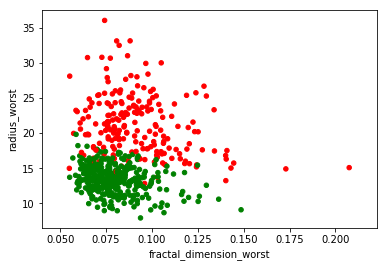

In [19]:
clrs = [ ['green','red'][lbl] for lbl in df.diagnosis ]
df.plot.scatter( 0, 1,  c = clrs);

Now we need the nearest neighbors graph.  We keep increasing _k_ until there is only one singular value equal to 0.  

Below I get you started:  

In [20]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nbrs.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])
indices

array([[  0, 373, 323, 564, 252],
       [  1, 256, 202,  70, 252],
       [  2, 302, 565, 280, 517],
       ..., 
       [566,  16, 117, 172, 489],
       [567, 218, 254, 449, 250],
       [568, 525, 116,  59,  61]])

In [21]:
vertNbrs = dict( [ (itm[0],itm[1:]) for itm in indices] )
dfGraph = nx.Graph(vertNbrs)

###  Exercise 1
Increase _k_ until there is only one connected component, and then cluster the resulting _k Nearest Neighbors_ graph using the Fiedler vector of the Laplacian matrix. Use the result to color a scatter plot of the data with color indicating cluster that data point is a member of. _Not required to predict unassociated points_. 

__ _SHOW YOUR WORK_ __ 

<p>&nbsp;</p>

## PageRank: Exercises 2,3,4

The next cell defines a __networkx__ __Graph__ object __G__ which models a 12 linked documents (i.e., search is over and we just need the ranking of these 12 documents).  Assume the names refer to, for instance, the "Facebook main page" of the person with that name (short names so graph draw looks good). We'll be supposing that the search term is the letter __A__ (see below):

In [22]:
G = nx.Graph({   'AL'  : ['JAN', 'JOHN', 'ANN', 'MARY'],
                 'AMY' : ['FRED', 'ANN', 'JAN', 'MARY', 'MAC'],
                 'ANN' : ['AMY', 'PAT', 'KYLE', 'BETH'],
                 'BETH': ['MARY', 'JAN', 'MARY'],
                 'FRED': ['KYLE', 'AMY', 'KYLE'],
                 'JAN' : ['MAC', 'AL', 'JOHN', 'ANN', 'KYLE'],
                 'JOHN': ['AMY', 'KYLE', 'PAT', 'FRED'],
                 'KYLE': ['MAC', 'MARY', 'ANN'],
                 'MAC' : ['JAN', 'BETH', 'FRED', 'PAT'],
                 'MARY': ['BETH', 'PAT', 'KYLE', 'ANN'],
                 'PAT' : ['KYLE', 'JOHN', 'ANN', 'SAM'],
                 'SAM' : ['BETH', 'JOHN', 'MARY']
            })

The next cell should draw the graph __G__,  which is a graph with 12 vertices labeled by first names. 

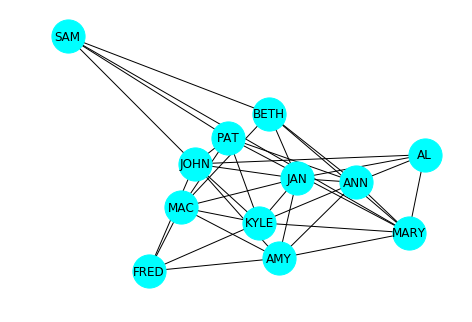

In [23]:
nx.draw(G, node_color='cyan', node_size = 1100, with_labels=True)

### Exercise 2

Apply the pagerank algorithm to your network using $\alpha =0.85$ and
a personalization matrix of 
\begin{equation*}
\mathbf{r}=\left\langle 
    \frac{1}{12},\ldots ,\frac{1}{12},\frac{1}{12},\frac{1}{12}\right\rangle
\end{equation*}
That is, construct the pagerank matrix _assuming for simplicity that
all edges go both directions._ That is, construct the pagerank matrix and then use the
power method to estimate the dominant eigenvector. (__NOTE:__ YOU MAY NEED TO 
RESCALE SO THE THE COFFICIENTS OF THE PAGERANK VECTOR ARE NON_NEGATIVE AND SUM TO 1).
Of all the vertices whose labels
contain the letter "A", which is the most important (i.e., highest ranked
based on $\mathbf{p}_{\mathbf{rank}}^{T}$ rescaled to have non-negative
coefficients that add up to one)?

### Exercise 3 
Apply the pagerank algorithm to your network using $\alpha = 0.85$ and a personalization matrix of 
\begin{equation*}
\mathbf{r}=\left\langle 
\frac{1}{10},\ldots ,\frac{1}{10},0,0\right\rangle 
\end{equation*}
That is, construct the pagerank matrix _assuming for simplicity that
all edges go both directions._ Then use the power method to estimate the rank for each page.
How does it differ (if at all) from the result in Exercise 2? Of all the vertices whose labels
contain the letter "A", which is the most important (i.e., highest ranked
based on $\mathbf{p}_{\mathbf{rank}}^{T}$ rescaled to have non-negative
coefficients that add up to one)?

### Exercise 4
Explain in your own words my explanation of why if $M$ is a matrix with 
$\left\Vert M\right\Vert <1,$ then  
\begin{equation*}
\left( I-M\right) ^{-1}=\sum_{n=0}^{\infty }M^{n}
\end{equation*}
(can use your textbook, other books, internet, etcetera).  

In [ ]:
# convert to markdown and put your explanation here

If $\mathbf{p}_{\mathbf{rank}}^{T}$ is your PageRank vector
from exercise 3, then $\mathbf{p}_{\mathbf{rank}}^{T}\mathbf{\cdot 1}=1$
because the coefficients sum to 1. If we let
\begin{equation*}
P=\alpha W+\left( 1-\alpha \right) \mathbf{1\cdot r}^{T}
\end{equation*}
then $\mathbf{p}_{\mathbf{rank}}^{T}$
is the right eigenvector of $P$ corresponding to the eigenvalue 1.  Thus, 
$\mathbf{p}_{\mathbf{rank}}^{T} P =\mathbf{p}_{\mathbf{rank}}^{T}$, so that  
\begin{equation*}
\mathbf{p}_{\mathbf{rank}}^{T}=\alpha \mathbf{p}_{\mathbf{rank}}^{T}W+\left(
1-\alpha \right) \mathbf{p}_{\mathbf{rank}}^{T}\mathbf{1\cdot r}^{T}
\end{equation*}
which leads to 
\begin{eqnarray*}
\mathbf{p}_{\mathbf{rank}}^{T}\left( I-\alpha W\right)  &=&\mathbf{r}%
^{T}\left( 1-\alpha \right)  \\
\mathbf{p}_{\mathbf{rank}}^{T} &=&\mathbf{r}^{T}\left( 1-\alpha \right)
\left( I-\alpha W\right) ^{-1}
\end{eqnarray*}
Now use the geometric series to explain why 
\begin{equation*}
\mathbf{p}_{\mathbf{rank}}^{T}=\mathbf{r}^{T}\sum_{n=0}^{\infty }\left(
1-\alpha \right) \alpha ^{n}W^{n}
\end{equation*}

In [ ]:
# convert to markdown and put your explanation here

Finally, write a Python loop that computes the following approximation of 
$\mathbf{p}_{\mathbf{rank}}^{T}:$ 
\begin{equation*}
\mathbf{p}_{\mathbf{rank}}^{T}\approx \mathbf{r}^{T}\sum_{n=0}^{1000}\left(
1-\alpha \right) \alpha ^{n}W^{n}
\end{equation*}